# MLP

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Split training data into training and validation sets (80% train, 20% validation)
train_images, val_images, train_labels, val_labels = train_test_split( train_images, train_labels, test_size=0.2, random_state=42)

# One-hot encode the labels
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

# Create a Sequential model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy' ])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# The model is now trained on the MNIST dataset with a Multilayer Perceptron architecture.
history.history


Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2844 - accuracy: 0.9185 - val_loss: 0.1568 - val_accuracy: 0.9551
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1287 - accuracy: 0.9620 - val_loss: 0.1124 - val_accuracy: 0.9669
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0880 - accuracy: 0.9737 - val_loss: 0.1026 - val_accuracy: 0.9695
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0646 - accuracy: 0.9806 - val_loss: 0.0874 - val_accuracy: 0.9740
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0493 - accuracy: 0.9852 - val_loss: 0.0843 - val_accuracy: 0.9755
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0382 - accuracy: 0.9890 - val_loss: 0.0819 - val_accuracy: 0.9747
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0297 - accuracy: 0.9909 - val_loss: 0.0878 - val_accuracy:

{'loss': [0.28443706035614014,
  0.12869969010353088,
  0.08803241699934006,
  0.06462323665618896,
  0.04931581765413284,
  0.03818998858332634,
  0.029743103310465813,
  0.02406868152320385,
  0.018466264009475708,
  0.016923576593399048],
 'accuracy': [0.9185208082199097,
  0.9620208144187927,
  0.9736875295639038,
  0.9805625081062317,
  0.9851874709129333,
  0.989020824432373,
  0.9908750057220459,
  0.9926666617393494,
  0.9943749904632568,
  0.9943958520889282],
 'val_loss': [0.15681575238704681,
  0.11244741082191467,
  0.10259903967380524,
  0.08737564086914062,
  0.08426088094711304,
  0.0818580612540245,
  0.08782315999269485,
  0.0856688916683197,
  0.09813239425420761,
  0.08693873137235641],
 'val_accuracy': [0.9550833106040955,
  0.9669166803359985,
  0.9695000052452087,
  0.9739999771118164,
  0.9754999876022339,
  0.9747499823570251,
  0.9757500290870667,
  0.9778333306312561,
  0.9744166731834412,
  0.9772499799728394]}

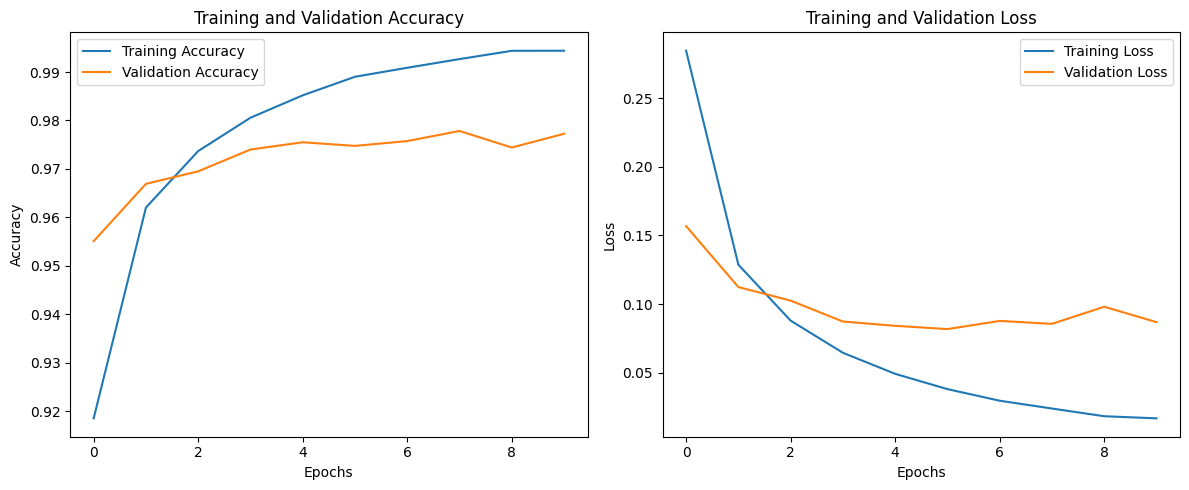

In [ ]:
import matplotlib.pyplot as plt



# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Error (Loss) plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



plt.tight_layout()
plt.show()


313/313 [==============================] - 1s 2ms/step


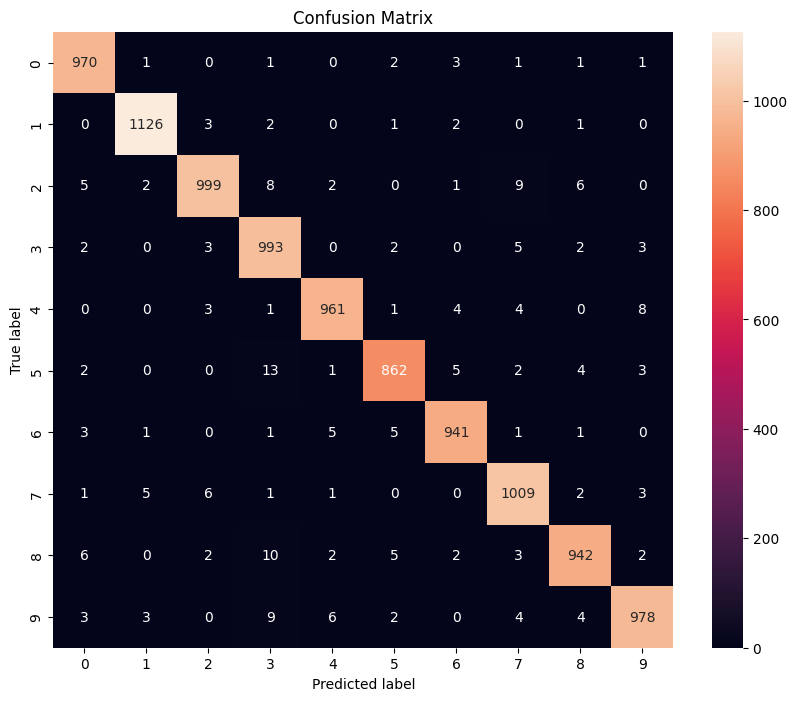

In [ ]:

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Predict the values from the test dataset
predicted_classes = model.predict(test_images)
predicted_classes = np.argmax(predicted_classes, axis=1)
test_labels=np.argmax(test_labels,axis=1)
# Compute the confusion matrix using the original class labels
cm = confusion_matrix(test_labels, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, predicted_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# CNN

In [ ]:

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Split training data into training and validation sets (80% train, 20% validation)
train_images, val_images, train_labels, val_labels = train_test_split( train_images, train_labels, test_size=0.2, random_state=42)

# One-hot encode the labels
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy' ])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# The model is now trained on the MNIST dataset with a Multilayer Perceptron architecture.
history.history


Epoch 1/10
1500/1500 [==============================] - 12s 5ms/step - loss: 0.1579 - accuracy: 0.9498 - val_loss: 0.0792 - val_accuracy: 0.9754
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0495 - accuracy: 0.9841 - val_loss: 0.0412 - val_accuracy: 0.9871
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0342 - accuracy: 0.9889 - val_loss: 0.0416 - val_accuracy: 0.9883
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0264 - accuracy: 0.9919 - val_loss: 0.0396 - val_accuracy: 0.9891
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0205 - accuracy: 0.9930 - val_loss: 0.0422 - val_accuracy: 0.9900
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.0479 - val_accuracy: 0.9883
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0144 - accuracy: 0.9958 - val_loss: 0.0529 - val_accuracy

{'loss': [0.15787053108215332,
  0.04950666427612305,
  0.034241899847984314,
  0.02635311894118786,
  0.020525328814983368,
  0.016977014020085335,
  0.014365012757480145,
  0.012706732377409935,
  0.010613756254315376,
  0.00875815749168396],
 'accuracy': [0.949791669845581,
  0.9841041564941406,
  0.988854169845581,
  0.991937518119812,
  0.9929583072662354,
  0.9943749904632568,
  0.9958333373069763,
  0.9959166646003723,
  0.996708333492279,
  0.9970625042915344],
 'val_loss': [0.07915502786636353,
  0.041156038641929626,
  0.04159626364707947,
  0.0395830012857914,
  0.042151495814323425,
  0.04790457710623741,
  0.05292928218841553,
  0.041710615158081055,
  0.04283282533288002,
  0.05317327007651329],
 'val_accuracy': [0.9754166603088379,
  0.9870833158493042,
  0.9882500171661377,
  0.9890833497047424,
  0.9900000095367432,
  0.9883333444595337,
  0.987583339214325,
  0.9887499809265137,
  0.9903333187103271,
  0.9886666536331177]}

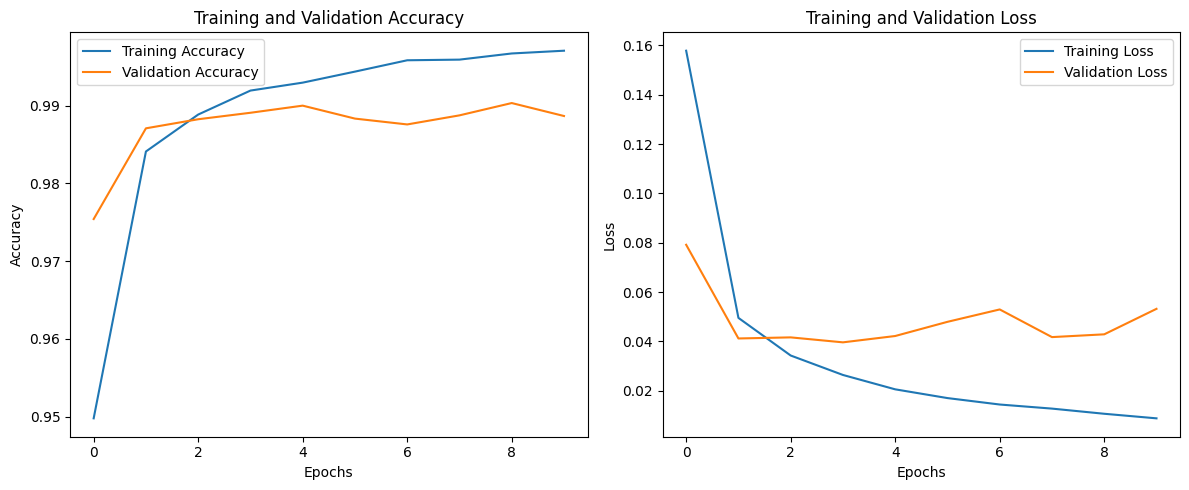

In [ ]:
import matplotlib.pyplot as plt



# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Error (Loss) plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



plt.tight_layout()
plt.show()

313/313 [==============================] - 1s 2ms/step


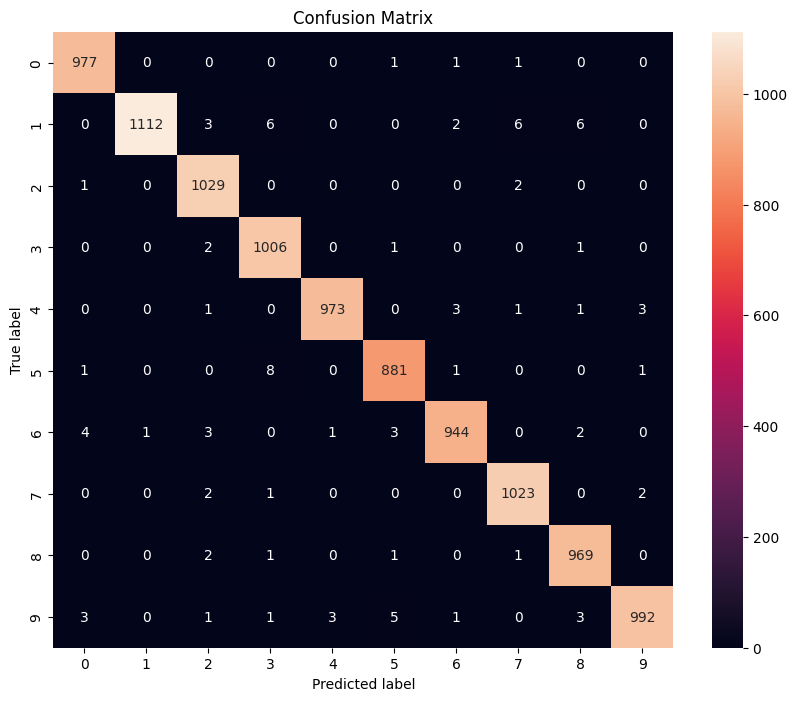

In [ ]:

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Predict the values from the test dataset
predicted_classes = model.predict(test_images)
predicted_classes = np.argmax(predicted_classes, axis=1)
test_labels=np.argmax(test_labels,axis=1)
# Compute the confusion matrix using the original class labels
cm = confusion_matrix(test_labels, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# MobileNet

In [ ]:
import tensorflow as tf

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Split training data into training and validation sets (80% train, 20% validation)
train_images, val_images, train_labels, val_labels = train_test_split( train_images, train_labels, test_size=0.2, random_state=42)

# Resize images to meet the minimum input size requirement of MobileNet
def resize_images(images):
    return tf.image.resize(images[..., None], (32, 32))

train_images = resize_images(train_images)
val_images = resize_images(val_images)
test_images = resize_images(test_images)

# One-hot encode the labels
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)


# Convert grayscale images to RGB format
train_images = tf.image.grayscale_to_rgb(train_images)
val_images = tf.image.grayscale_to_rgb(val_images)
test_images = tf.image.grayscale_to_rgb(test_images)

model = tf.keras.applications.mobilenet.MobileNet(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(32, 32, 3),
    include_top=False
    )
# Create your custom MLP on top of MobileNet
model = tf.keras.models.Sequential([
    model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy' ])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# The model is now trained on the MNIST dataset with a Multilayer Perceptron architecture.
history.history


17225924/17225924 [==============================] - 0s 0us/step
Epoch 1/10
1500/1500 [==============================] - 49s 19ms/step - loss: 0.2642 - accuracy: 0.9276 - val_loss: 0.1296 - val_accuracy: 0.9653
Epoch 2/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1225 - accuracy: 0.9683 - val_loss: 0.1516 - val_accuracy: 0.9544
Epoch 3/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1050 - accuracy: 0.9731 - val_loss: 0.1300 - val_accuracy: 0.9653
Epoch 4/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0832 - accuracy: 0.9793 - val_loss: 0.0880 - val_accuracy: 0.9779
Epoch 5/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0744 - accuracy: 0.9816 - val_loss: 0.0604 - val_accuracy: 0.9836
Epoch 6/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0647 - accuracy: 0.9840 - val_loss: 0.0741 - val_accuracy: 0.9799
Epoch 7/10
1500/1500 [==============================] - 27s

{'loss': [0.2642473876476288,
  0.1224728599190712,
  0.1050393283367157,
  0.08324889093637466,
  0.0743890255689621,
  0.06474914401769638,
  0.05789974331855774,
  0.05615633726119995,
  0.05081693083047867,
  0.03837626054883003],
 'accuracy': [0.9276250004768372,
  0.9682708382606506,
  0.9730833172798157,
  0.9792500138282776,
  0.9816250205039978,
  0.9840208292007446,
  0.9856666922569275,
  0.987458348274231,
  0.987666666507721,
  0.9900416731834412],
 'val_loss': [0.12960533797740936,
  0.15161804854869843,
  0.13004128634929657,
  0.0880039781332016,
  0.06038522347807884,
  0.07410530745983124,
  0.04326002672314644,
  0.07705327868461609,
  0.08077815920114517,
  0.037879105657339096],
 'val_accuracy': [0.9653333425521851,
  0.9544166922569275,
  0.9653333425521851,
  0.9779166579246521,
  0.9835833311080933,
  0.9799166917800903,
  0.9900833368301392,
  0.9800833463668823,
  0.987500011920929,
  0.9904166460037231]}

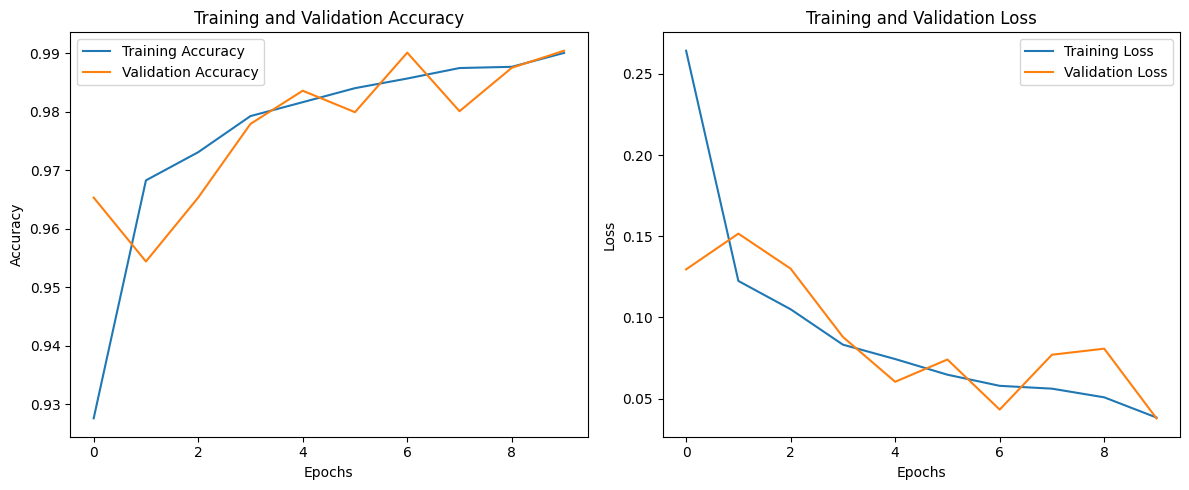

In [ ]:
import matplotlib.pyplot as plt



# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Error (Loss) plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



plt.tight_layout()
plt.show()

313/313 [==============================] - 2s 4ms/step


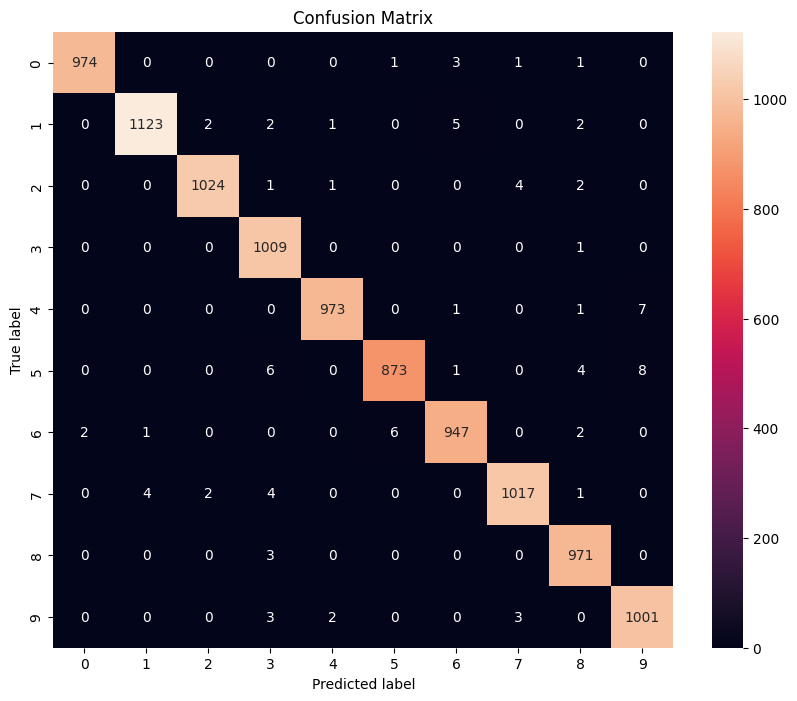

In [ ]:

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Predict the values from the test dataset
predicted_classes = model.predict(test_images)
predicted_classes = np.argmax(predicted_classes, axis=1)
test_labels=np.argmax(test_labels,axis=1)
# Compute the confusion matrix using the original class labels
cm = confusion_matrix(test_labels, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()